In [1]:
import pandas as pd
import seaborn as sns
from utils.dataLoader import DataLoader
from utils.dataProcessor import DataProcessor
import matplotlib.pyplot as plt

In [2]:
loader = DataLoader()

datadir = 'src/datasets'
files = ['amostra_projeto1.csv', 'amostra_projeto_2.csv', 'amostra_projeto_3.csv']

loader._load_data_from_path(datadir, files)
loader._load_predict_set(datadir, 'projeto_4.csv')

(              Info            Valor
 0           Titulo  Projeto 4 - Je3
 1        Tipologia          Sobrado
 2     Área Terreno           250,00
 3  Área Construída           257,00
 4    Área Fundação           221,36
 5     Área Fachada           430,11
 6      Área Parede           547,27
 7        Qtde BWCs             6,00,
         file           titulo tipologia  area_terreno  area_construída  \
 0  projeto_4  Projeto 4 - Je3   Sobrado         250.0            257.0   
 
    area_fundação  area_fachada  area_parede  qtde_bwcs  
 0         221.36        430.11       547.27        6.0  )

In [3]:
loader.dfs['amostra_projeto1']['header']

,Info,Valor
0,Titulo,Projeto 1 - Wa
1,Tipologia,Térrea
2,Área Terreno,"485,00"
3,Área Construída,"246,63"
4,Área Fundação,"237,98"
5,Área Fachada,"597,88"
6,Área Parede,"615,86"
7,Qtde BWCs,"5,00"


In [4]:
loader.dfs['amostra_projeto1']['budget']
#faça contagem de valores nulos
loader.dfs['amostra_projeto1']['budget'].isnull().sum()

Item                          0
Referência                   59
Tipo                         59
Código                       59
Descrição                     0
Unid.                        59
Quantidade                   59
BDI                           0
Preço Material (Unitário)    79
Preço Material (Total)       34
Preço Execução (Unitário)    86
Preço Execução (Total)       32
Preço (Unitário)             59
Preço (Total)                 0
dtype: int64

Relações

In [5]:
processor = DataProcessor(loader)

In [6]:
processor._get_stats_by_key('amostra_projeto1')

,Preço Material (Unitário),Preço Material (Total),Preço Execução (Unitário),Preço Execução (Total),Preço (Unitário),Preço (Total)
count,72.000000,117.000000,65.000000,119.000000,92.000000,151.000000
mean,480.737500,17270.030940,328.507385,9534.377143,608.326957,20895.261656
std,843.584134,24043.951664,606.836134,14554.464268,876.974707,33851.230804
min,7.040000,2.430000,1.120000,1.120000,1.120000,1.120000
25%,54.362500,1941.230000,30.000000,934.650000,88.990000,1699.500000
50%,138.850000,6600.000000,80.000000,4888.260000,212.975000,7200.000000
75%,685.000000,23464.290000,205.000000,10869.525000,825.000000,25762.100000
max,5165.000000,148767.710000,3000.000000,91520.290000,5345.000000,233799.310000


In [7]:
processor._calculate_totals('amostra_projeto1')

{'total_material_cost': 2020593.62,
 'total_execution_cost': 1134590.88,
 'total_cost': 3155184.5100000007}

In [8]:
loader.dfs['amostra_projeto1']['header_T']

,file,titulo,tipologia,area_terreno,area_construída,area_fundação,area_fachada,area_parede,qtde_bwcs
0,amostra_projeto1,Projeto 1 - Wa,Térrea,485.0,246.63,237.98,597.88,615.86,5.0


In [9]:
budget_pj1 = loader.dfs['amostra_projeto1']['budget']

In [10]:
loader._grouping_item_totals(budget_pj1).sort_values('Preço (Total)', ascending=False)

,Descrição,Preço Material (Total),Preço Execução (Total),Preço (Total)
Item,,,,
4,SUPRAESTRUTURA,446303.13,255094.80,701397.93
3,INFRAESTRUTURA,286207.92,274560.87,560768.80
8,PISOS,261071.55,112066.56,373138.11
9,PAREDES,208938.66,123559.92,332498.58
11,ESQUADRIAS,185841.69,6300.00,192141.69
7,INSTALACOES HIDROSSANITARIAS,148798.50,28635.00,177433.50
13,INSTALACOES COMPLEMENTARES,152122.80,6390.60,158513.40
5,COBERTURA,122990.13,24525.00,147515.13
2,SERVICOS PRELIMINARES E GERAIS,34551.90,105591.00,140142.90


In [11]:
h_totals = processor.aggregate_header_totals()

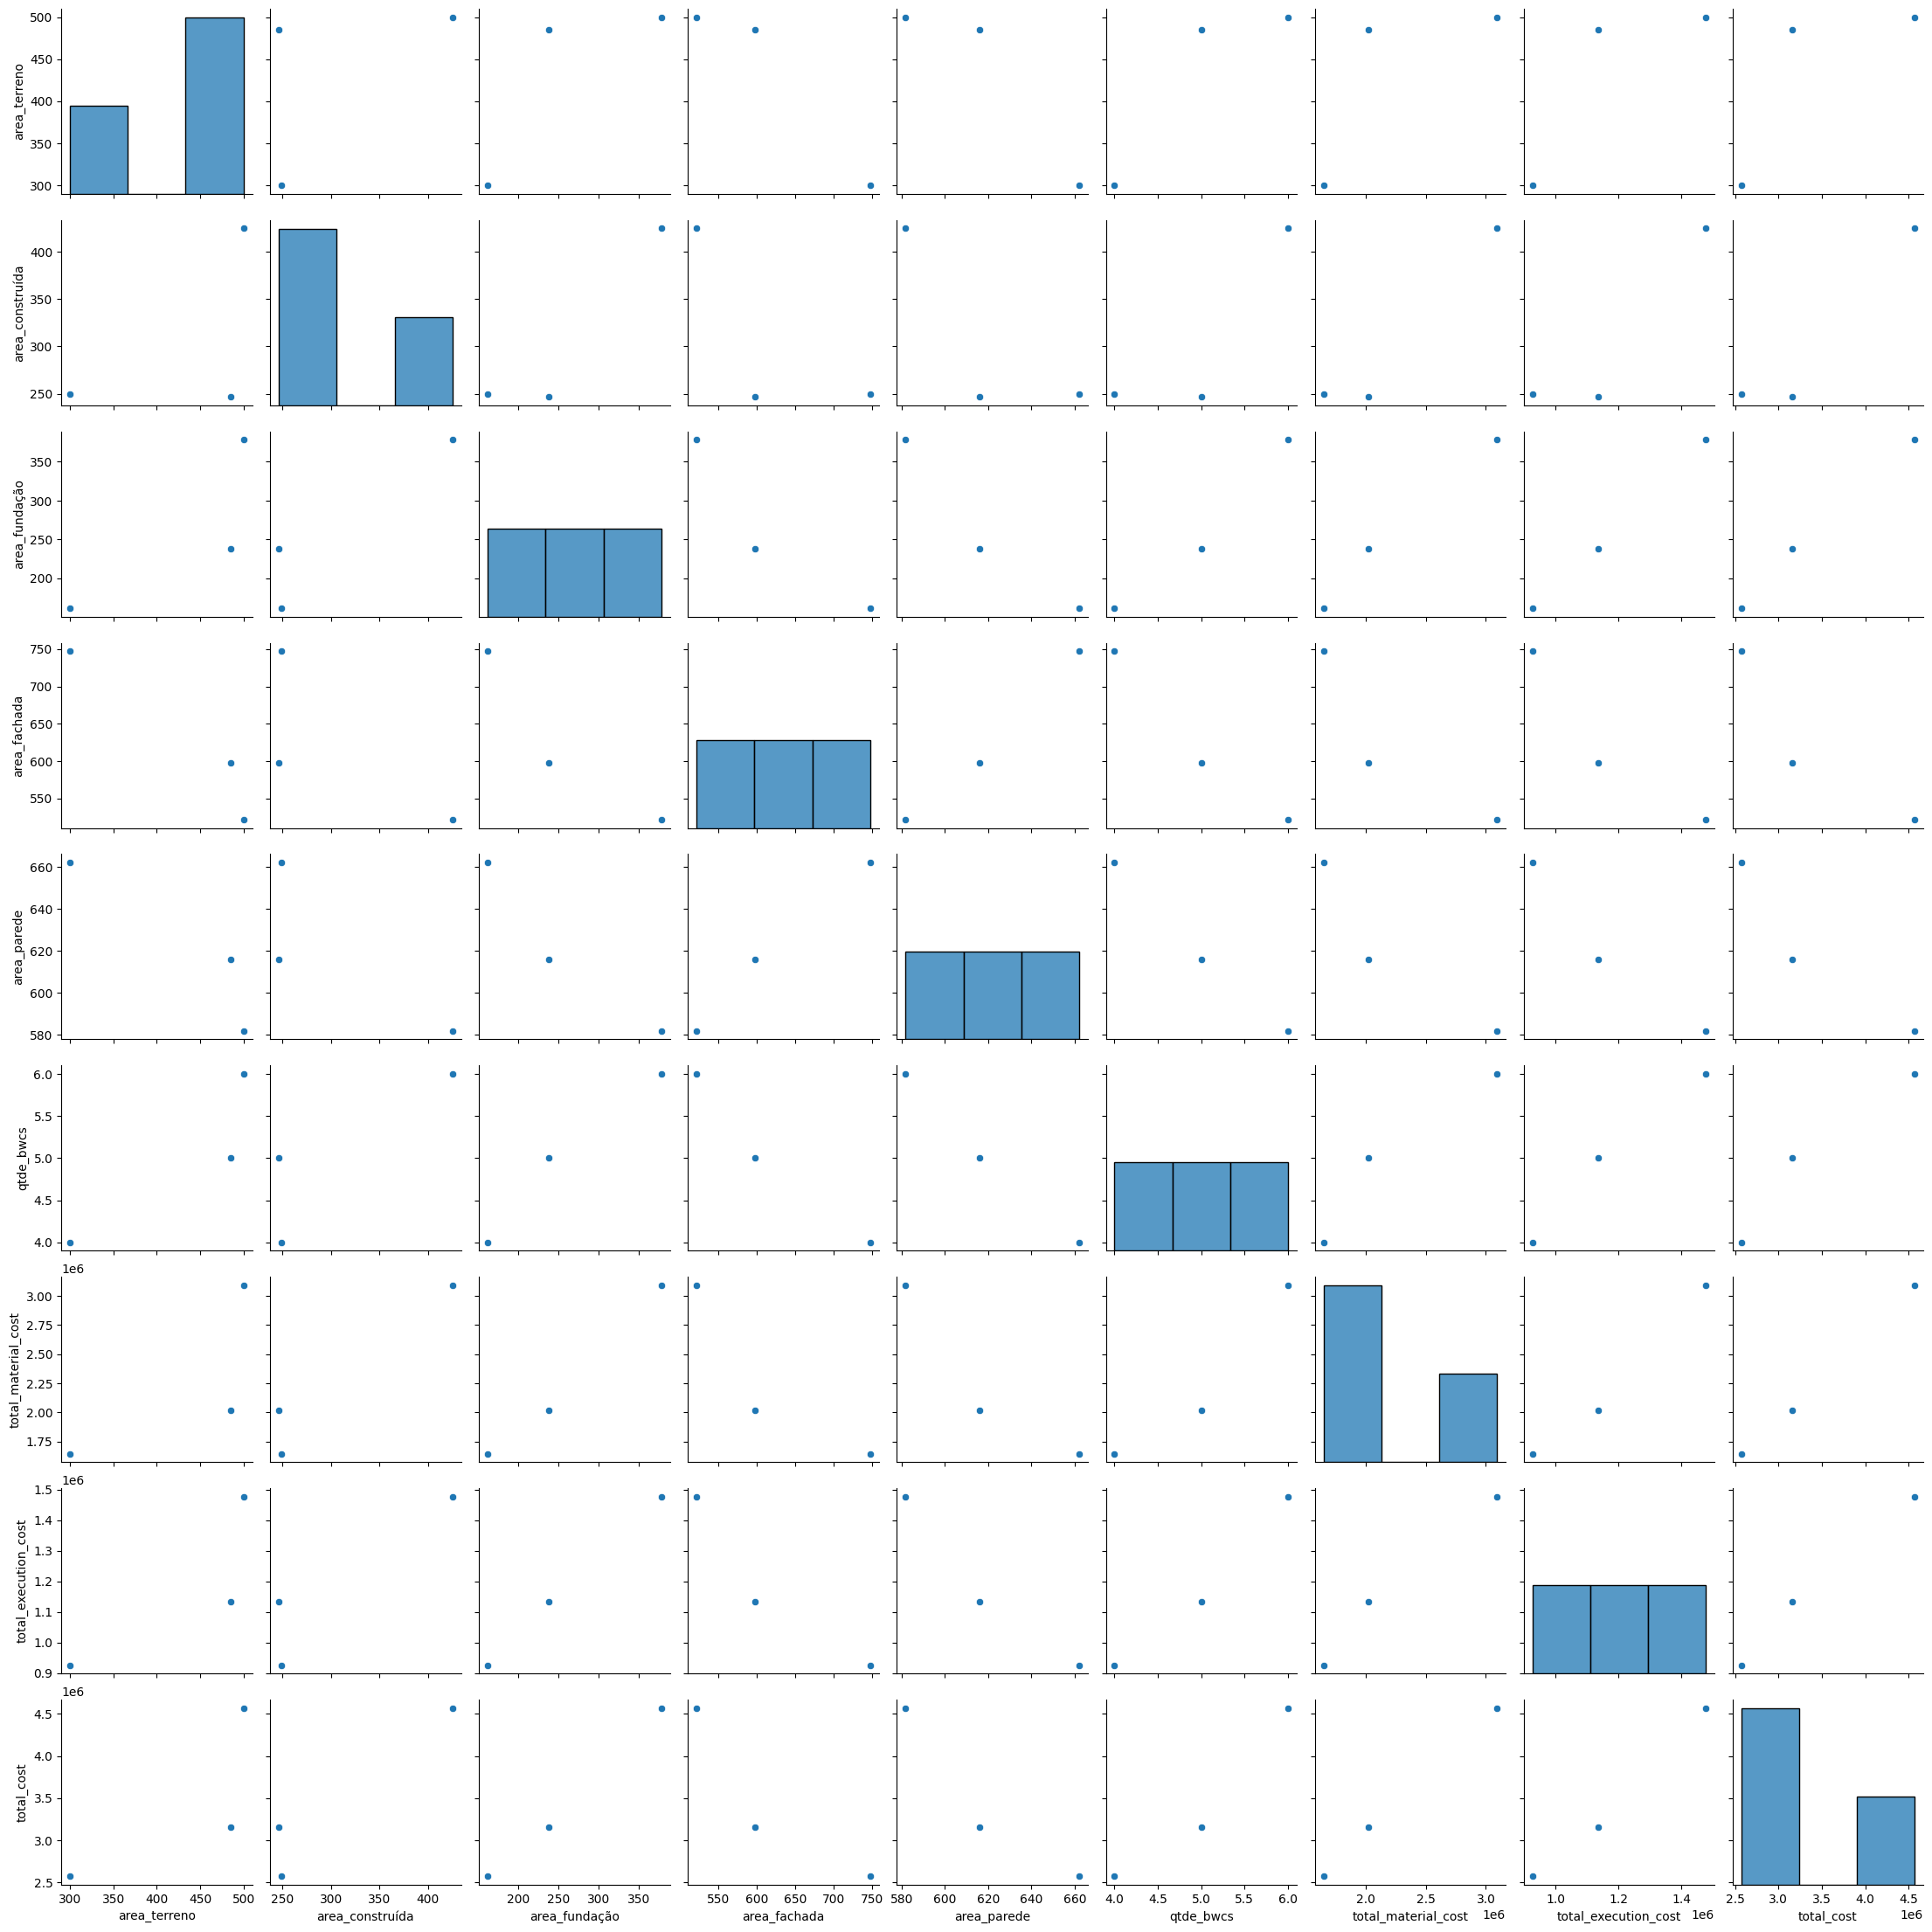

In [12]:
#pairplot
sns.pairplot(h_totals)

In [13]:
all_tables = processor._concat_tables(h_totals)
all_tables

Descrição,file,titulo,tipologia,area_terreno,area_construída,area_fundação,area_fachada,area_parede,qtde_bwcs,COBERTURA,...,INSTALACOES COMPLEMENTARES,INSTALACOES ELETRICAS,INSTALACOES HIDROSSANITARIAS,"LIMPEZA, ACABAMENTOS E FINALIZACOES",PAREDES,PINTURAS,PISOS,SERVICOS PRELIMINARES E GERAIS,SONDAGEM,SUPRAESTRUTURA
0,amostra_projeto1,Projeto 1 - Wa,Térrea,485.0,246.63,237.98,597.88,615.86,5.0,147515.13,...,158513.4,105740.7,177433.5,47659.37,332498.58,130827.03,373138.11,140142.9,NaN,701397.93
1,amostra_projeto_2,Projeto 2 - Ca,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0,155564.78,...,84943.5,107025.0,164595.0,44864.01,297016.71,148306.08,218822.48,118341.6,24258.75,687826.63
2,amostra_projeto_3,Projeto 3 - Je2,Sobrado,500.0,425.00,378.31,521.67,581.76,6.0,124734.45,...,446788.8,181942.5,262087.5,129447.39,479209.71,139903.21,460683.73,169831.8,NaN,1005869.87


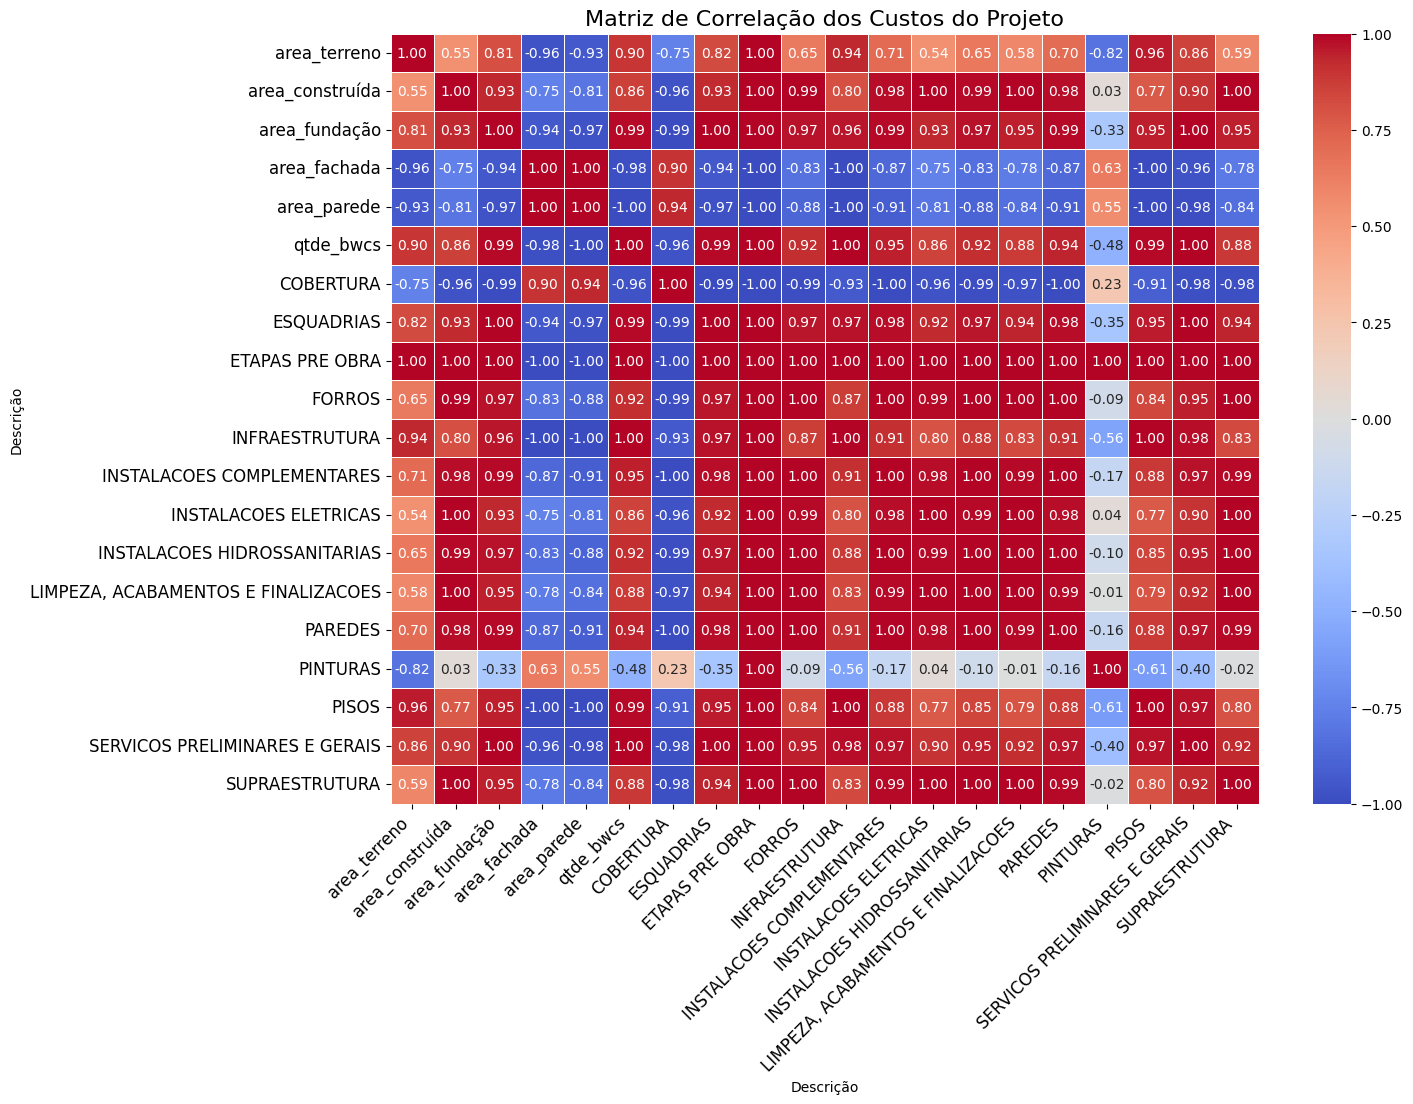

In [14]:
numeric_cols = all_tables.select_dtypes(include=['float64']).columns.to_list()

numeric_cols = [col for col in numeric_cols if col not in ['FINALIZACAO DA OBRA', 'SONDAGEM']]

corr = all_tables[numeric_cols].corr()
plt.figure(figsize=(14, 10))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Matriz de Correlação dos Custos do Projeto', fontsize=16)

plt.show()

In [15]:
h_totals

,file,titulo,tipologia,area_terreno,area_construída,area_fundação,area_fachada,area_parede,qtde_bwcs,total_material_cost,total_execution_cost,total_cost
0,amostra_projeto1,Projeto 1 - Wa,Térrea,485.0,246.63,237.98,597.88,615.86,5.0,2020593.62,1134590.88,3155184.51
1,amostra_projeto_2,Projeto 2 - Ca,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0,1645278.80,925623.15,2570901.95
2,amostra_projeto_3,Projeto 3 - Je2,Sobrado,500.0,425.00,378.31,521.67,581.76,6.0,3092003.20,1477021.95,4569025.15


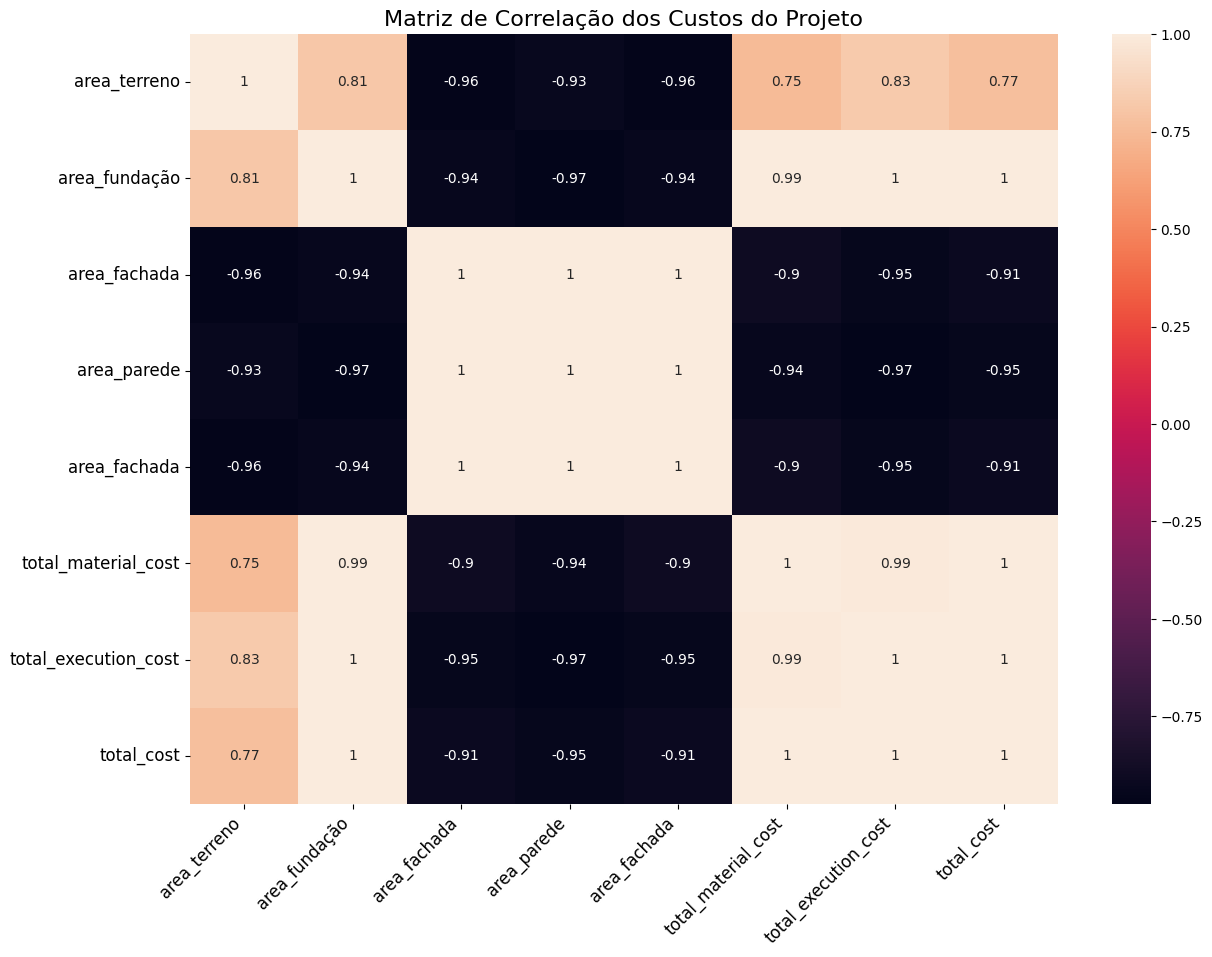

In [16]:
numeric_cols = [
    "area_terreno", 
    "area_fundação", 
    "area_fachada", 
    "area_parede", 
    "area_fachada",
    "total_material_cost", 
    "total_execution_cost", 
    "total_cost"
]

plt.figure(figsize=(14, 10))

sns.heatmap(h_totals[numeric_cols].corr(), annot=True)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Matriz de Correlação dos Custos do Projeto', fontsize=16)

plt.show()

In [17]:
from utils.models import Predictor
header_totals = h_totals.copy()

totals = ['total_execution_cost','total_material_cost','total_cost']

In [18]:
header_totals

,file,titulo,tipologia,area_terreno,area_construída,area_fundação,area_fachada,area_parede,qtde_bwcs,total_material_cost,total_execution_cost,total_cost
0,amostra_projeto1,Projeto 1 - Wa,Térrea,485.0,246.63,237.98,597.88,615.86,5.0,2020593.62,1134590.88,3155184.51
1,amostra_projeto_2,Projeto 2 - Ca,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0,1645278.80,925623.15,2570901.95
2,amostra_projeto_3,Projeto 3 - Je2,Sobrado,500.0,425.00,378.31,521.67,581.76,6.0,3092003.20,1477021.95,4569025.15


In [19]:
prd = Predictor(header_totals)
for col in totals:
    train_cols = [col for col in header_totals.columns if col not in ['file', 'titulo', 'area_fundação', 'total_cost', 'total_execution_cost', 'total_material_cost']]
    X = header_totals[train_cols]
    y = header_totals['total_cost']

    X, scaler, encoder  = processor._encode_train_data(X)

    prd.fit(X,y)
    pred = prd.predict(loader.predict_df[train_cols])
    print(f'{col}: {round(pred[0],2)}')

   area_terreno  area_construída  area_fachada  area_parede  qtde_bwcs  \
0         0.925         0.000000       0.33796     0.424658        0.5   
1         0.000         0.014633       1.00000     1.000000        0.0   
2         1.000         1.000000       0.00000     0.000000        1.0   

   tipologia_Sobrado  tipologia_Térrea  
0                0.0               1.0  
1                1.0               0.0  
2                1.0               0.0  
total_execution_cost: 1325055.01
   area_terreno  area_construída  area_fachada  area_parede  qtde_bwcs  \
0         0.925         0.000000       0.33796     0.424658        0.5   
1         0.000         0.014633       1.00000     1.000000        0.0   
2         1.000         1.000000       0.00000     0.000000        1.0   

   tipologia_Sobrado  tipologia_Térrea  
0                0.0               1.0  
1                1.0               0.0  
2                1.0               0.0  
total_material_cost: 2687063.71
   area_terre

In [26]:
from sklearn.metrics import root_mean_squared_error
prd = Predictor(header_totals)
for col in totals:
    train_cols = [col for col in header_totals.columns if col not in ['file', 'titulo', 'area_fundação', 'total_cost', 'total_execution_cost', 'total_material_cost']]
    X = header_totals[train_cols]
    y = header_totals[col]

    #separete train and test using the first and the third row for train and the second for test
    X_train, X_test = X.iloc[[0,2]], X.iloc[[1]]
    y_train, y_test = y.iloc[[0,2]], y.iloc[[1]]

    prd.fit(X_train, y_train, use_scaler=True)

    pred = prd.predict(X_test, use_scaler=False)

    rmse = root_mean_squared_error(y_test, pred)

    print(f'{col}: {round(pred[0],2)}')
    print(f'RMSE: {round(rmse,2)}')

   area_terreno  area_construída  area_fachada  area_parede  qtde_bwcs  \
0           0.0              0.0           1.0          1.0        0.0   
1           NaN              NaN           NaN          NaN        NaN   
2           1.0              1.0           0.0          0.0        1.0   

   tipologia_Sobrado  tipologia_Térrea  
0                0.0               1.0  
1                1.0               0.0  
2                0.0               0.0  


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [21]:
header_totals

,file,titulo,tipologia,area_terreno,area_construída,area_fundação,area_fachada,area_parede,qtde_bwcs,total_material_cost,total_execution_cost,total_cost
0,amostra_projeto1,Projeto 1 - Wa,Térrea,485.0,246.63,237.98,597.88,615.86,5.0,2020593.62,1134590.88,3155184.51
1,amostra_projeto_2,Projeto 2 - Ca,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0,1645278.80,925623.15,2570901.95
2,amostra_projeto_3,Projeto 3 - Je2,Sobrado,500.0,425.00,378.31,521.67,581.76,6.0,3092003.20,1477021.95,4569025.15


In [22]:
loader.predict_df[train_cols]

,tipologia,area_terreno,area_construída,area_fachada,area_parede,qtde_bwcs
0,Sobrado,250.0,257.0,430.11,547.27,6.0


In [23]:
header_totals[train_cols]

,tipologia,area_terreno,area_construída,area_fachada,area_parede,qtde_bwcs
0,Térrea,485.0,246.63,597.88,615.86,5.0
1,Sobrado,300.0,249.24,747.17,662.06,4.0
2,Sobrado,500.0,425.00,521.67,581.76,6.0


In [24]:
header_totals[train_cols].drop(columns=['tipologia']).corr()

,area_terreno,area_construída,area_fachada,area_parede,qtde_bwcs
area_terreno,1.000000,0.546529,-0.963437,-0.932530,0.897725
area_construída,0.546529,1.000000,-0.750926,-0.812048,0.859573
area_fachada,-0.963437,-0.750926,1.000000,0.995183,-0.982942
area_parede,-0.932530,-0.812048,0.995183,1.000000,-0.996237
qtde_bwcs,0.897725,0.859573,-0.982942,-0.996237,1.000000


In [25]:
X = header_totals[train_cols]
y = header_totals[totals[2]]
prd.fit_stats_model(X,y)

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                nan
Time:                        12:50:58   Log-Likelihood:                 59.440
No. Observations:                   3   AIC:                            -112.9
Df Residuals:                       0   BIC:                            -115.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.478e+06        in

/Users/vitao/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/vitao/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/vitao/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/vitao/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
